# COMP5318 - Machine Learning and Data Mining 

## MLPC

#### 10 fold cross validation

### 1 Load data

In [10]:
import numpy as np
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

### 2 Standardization

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_test)
X_test = scaler.transform(X_test)

scaler.fit(X_train)
X_train = scaler.transform(X_train)

G:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### 3 MLPC

#### 3.1 Define MLPC function

In [12]:
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
def MLPC_parallel(X_train,y_train,X_val,y_val):
    
    pca = PCA(0.9) # PCA retain 90% variance
    pca.fit(X_train) # train PCA
    
    X_train_PCA = pca.transform(X_train) # PCA transform for training data
    X_val_PCA = pca.transform(X_val) # PCA transform for teting data
    
    MLPC = MLPClassifier(activation= 'relu', hidden_layer_sizes= [100]) # define MLPC parameters: relu activation function, 100 hidden neural
    MLPC.fit(X_train_PCA, y_train) # train MLPC model

    return [y_val,MLPC.predict(X_val_PCA)] # return [true label, predicted label]

#### 3.2 10-fold CV with parallel processing

In [13]:
%%time
from joblib import Parallel, delayed
import multiprocessing
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, random_state=666) # split data into 10 pairs of training set and validation set
 
num_cores = multiprocessing.cpu_count() # count available CPU
    
# parallel processing for 10-fold CV with all CPU working in parallel
result=Parallel(n_jobs=num_cores)(delayed(MLPC_parallel)(X_train[train],y_train[train],X_train[test],y_train[test] ) for train, test in kf.split(X_train))
# Wall time: 2min 53s

Wall time: 2min 53s


### 4 Evaluation

#### 4.1 Classification report

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

tmp=np.hstack(np.asarray(result)) # stack all results from parallel processing

print(classification_report(tmp[0], tmp[1]))
print(accuracy_score(tmp[0], tmp[1])) # 0.87685

#              precision    recall  f1-score   support

#           0       0.83      0.82      0.83      6000
#           1       0.98      0.98      0.98      6000
#           2       0.80      0.80      0.80      6000
#           3       0.89      0.88      0.89      6000
#           4       0.79      0.80      0.80      6000
#           5       0.96      0.95      0.95      6000
#           6       0.69      0.70      0.70      6000
#           7       0.94      0.93      0.94      6000
#           8       0.96      0.96      0.96      6000
#           9       0.94      0.96      0.95      6000

# avg / total       0.88      0.88      0.88     60000

             precision    recall  f1-score   support

          0       0.82      0.82      0.82      6000
          1       0.98      0.98      0.98      6000
          2       0.80      0.81      0.81      6000
          3       0.88      0.88      0.88      6000
          4       0.80      0.80      0.80      6000
          5       0.95      0.95      0.95      6000
          6       0.69      0.70      0.70      6000
          7       0.94      0.93      0.94      6000
          8       0.96      0.95      0.96      6000
          9       0.95      0.95      0.95      6000

avg / total       0.88      0.88      0.88     60000

0.87685


#### 4.2 Confusion matrix

In [7]:
from sklearn.metrics import confusion_matrix

cm_dt=confusion_matrix(tmp[0], tmp[1])
cm_dt

# array([[4934,   19,  122,  144,   28,    5,  704,    1,   41,    2],
#        [  13, 5857,   11,   75,   11,    2,   24,    1,    5,    1],
#        [ 112,    5, 4780,   67,  546,    7,  463,    0,   19,    1],
#        [ 157,   65,   66, 5294,  218,    3,  173,    1,   21,    2],
#        [  24,   14,  487,  192, 4829,    4,  426,    0,   23,    1],
#        [   3,    2,    4,    3,    1, 5716,    5,  141,   31,   94],
#        [ 666,   16,  450,  145,  430,    5, 4227,    1,   58,    2],
#        [   0,    1,    2,    0,    0,  141,    0, 5609,   11,  236],
#        [  34,    8,   30,   33,   31,   26,   65,   12, 5752,    9],
#        [   0,    3,    2,    2,    1,   68,    1,  183,    8, 5732]],
#       dtype=int64)

array([[4934,   19,  122,  144,   28,    5,  704,    1,   41,    2],
       [  13, 5857,   11,   75,   11,    2,   24,    1,    5,    1],
       [ 112,    5, 4780,   67,  546,    7,  463,    0,   19,    1],
       [ 157,   65,   66, 5294,  218,    3,  173,    1,   21,    2],
       [  24,   14,  487,  192, 4829,    4,  426,    0,   23,    1],
       [   3,    2,    4,    3,    1, 5716,    5,  141,   31,   94],
       [ 666,   16,  450,  145,  430,    5, 4227,    1,   58,    2],
       [   0,    1,    2,    0,    0,  141,    0, 5609,   11,  236],
       [  34,    8,   30,   33,   31,   26,   65,   12, 5752,    9],
       [   0,    3,    2,    2,    1,   68,    1,  183,    8, 5732]],
      dtype=int64)

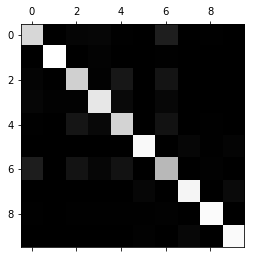

In [9]:
# visualization
import matplotlib.pyplot as plt
plt.matshow(cm_dt, cmap=plt.cm.gray)
plt.show()
#present in gray value, bigger values are brighter


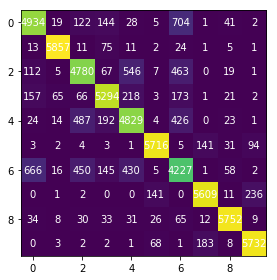

In [10]:
#another way to visulize
fig, ax = plt.subplots()
im = ax.imshow(cm_dt)
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, cm_dt[i][j], ha='center', va='center', color='w')
fig.tight_layout()
plt.show()

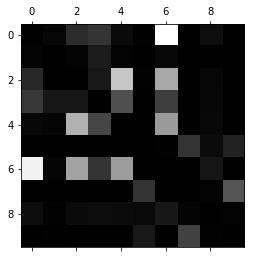

In [11]:
error_matrix = cm_dt / np.sum(cm_dt, axis=1)
np.fill_diagonal(error_matrix, 0)
#error_matrix: the bigger value means more wrong predictions
# visualization
import matplotlib.pyplot as plt
plt.matshow(error_matrix, cmap=plt.cm.gray)
plt.show()
#present in gray value, bigger values are brighter